In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification

# I will try to complete the program without the module
# from sklearn.model_selection import train_test_split
# Import the JY_Toolkit that complete by my hands
import os,sys
parentdir = os.path.dirname(os.path.abspath('.'))
temp_path = os.path.join(parentdir,'JY_Toolkit')
sys.path.insert(0,temp_path)
from JY_Toolkit import Jy_makeDataset,Jy_dataSetProcess

random_seed = 5225


# 生成数据集，并显示数据集分布

JY_makeDataset 是我自己写的一个用于生成数据集的包，不过目前里面只有生成这种两个半圆的功能

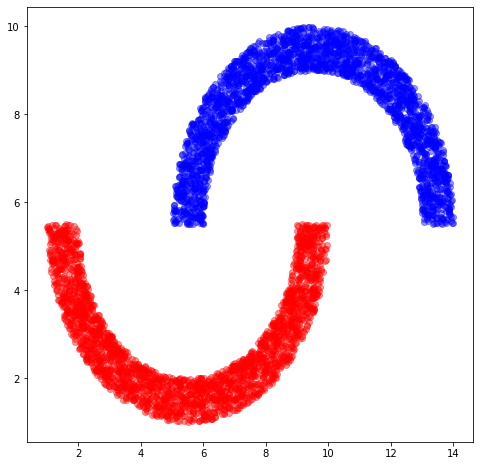

In [2]:
# Set random number seed for random module to make it easy to reproduce
Jy_makeDataset.random_state(random_seed)
## using the Jy_makeDataset.draw_HalfMoon （我自己写的 数据集 生成程序）
X,y = Jy_makeDataset.draw_HalfMoon(n_sample=5000,positive_val= 1,negative_val= -1,slope=0)   
## using the sklearn.datasets.make_classification to generate data set
# X,y = make_classification(n_samples=2000, n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1,random_state= random_seed)

y = np.array(list(map(lambda x : 1 if x == 1 else -1,list(y))))

fig = plt.figure(num = 1 , figsize=(8,8))

p_x1 = [X[i,0] for i in range(len(X)) if y[i] == 1]
p_x2 = [X[i,1] for i in range(len(X)) if y[i] == 1]
n_x1 = [X[i,0] for i in range(len(X)) if y[i] == -1]
n_x2 = [X[i,1] for i in range(len(X)) if y[i] == -1]

ax1 = fig.add_subplot(111)
ax1.scatter(p_x1,p_x2,c = 'blue',alpha = 0.4)
ax1.scatter(n_x1,n_x2,c = 'red',alpha = 0.4)

plt.show()

# 训练集数据集分离

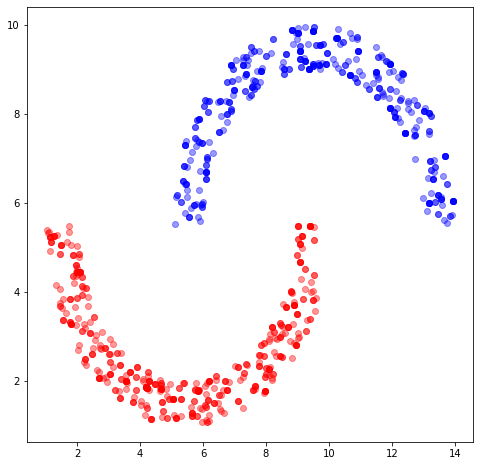

In [3]:
## 这里先直接使用了 sklearn 只自带的 分离模块
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = random_seed)

## 这里用我自己写的
X_train,X_test,y_train,y_test = Jy_dataSetProcess.Jy_train_test_split(X,y,test_size = 0.2)


fig = plt.figure(num = 1 , figsize=(8,8))

p_x1 = [X_test[i,0] for i in range(len(X_test)) if y_test[i] == 1]
p_x2 = [X_test[i,1] for i in range(len(X_test)) if y_test[i] == 1]
n_x1 = [X_test[i,0] for i in range(len(X_test)) if y_test[i] == -1]
n_x2 = [X_test[i,1] for i in range(len(X_test)) if y_test[i] == -1]

ax1 = fig.add_subplot(111)
ax1.scatter(p_x1,p_x2,c = 'blue',alpha = 0.4)
ax1.scatter(n_x1,n_x2,c = 'red',alpha = 0.4)

plt.show()

In [4]:
class Perceptron(object):
    # fit training data to get a Suitable parameters
    def __init__(self,
                 # the dimension of the parameter (dim(x))
                 w_dim,
                 epoch=10,           # the train times
                 l_rate=0.01):       # learning rate
        self.w = np.ones(w_dim + 1, dtype=np.float32)
        self.l_rate = l_rate
        self.epoch = epoch
        self.lost = []

    def sign(self, x):
        y = float(np.dot(x, self.w))
        if y >= 0:
            return 1
        else:
            return -1

    def weighted_sum(self,x):
        return float(np.dot(x,self.w))

    def weighted_sum_all(self,X):
        return np.dot(X,self.w)

    def fit(self,
            # input features set -- type should be `numpy.ndarray` (best)
            X_train,
            y_train):           # Expected label/output

        temp = np.ones(len(X_train))
        X_train = np.column_stack((X_train, temp))  # up X dimension
        del temp                # Recycle temp
        
        self.lost.clear()   # claer the list of lost
        lost_temp = 0
        for iter_ in range(self.epoch):
            for i in range(len(X_train)):
                x = X_train[i]
                y = y_train[i]
                # SGD 
                fit_res = self.sign(x)
                if y != fit_res:
                    lost_temp += 1
                    ## solution 1   : 
                    # self.w  = self.w + self.l_rate*(y - fit_res)*x
                    ## solution 2   :
                    self.w += x*y*self.l_rate
            self.lost.append(lost_temp)
            if iter_%5 == 0:
                print('iter_:',iter_,'lost:',lost_temp)
            lost_temp = 0

    def predict(self,X_test):
        temp = np.ones(len(X_test))
        X_test = np.column_stack((X_test, temp))  # up X dimension
        del temp                # Recycle temp
        y_predict = list(map(lambda x : 1 if x >= 0 else -1,list(self.weighted_sum_all(X_test))))
        return np.array(y_predict)

    def score(self,y,label):
        accuracy = 0
        for i in range(len(y)):
            if  y[i] == label[i]:
                accuracy += 1
        return accuracy / len(label), len(label) - accuracy
        
    pass


In [5]:
if __name__ == '__main__':

    perceptron = Perceptron(X_train.shape[1],epoch=500,l_rate= 0.0001)
    perceptron.fit(X_train, y_train)
    y_predict = perceptron.predict(X_test)
    accuracy_rate, lost_count = perceptron.score(y_test, y_predict)
    print('score:',accuracy_rate,'test lost:',lost_count,'last lost:',perceptron.lost[len(perceptron.lost)-1])
    print(f'w:{perceptron.w}')
    

iter_: 0 lost: 2035
iter_: 5 lost: 2222
iter_: 10 lost: 338
iter_: 15 lost: 169
iter_: 20 lost: 119
iter_: 25 lost: 125
iter_: 30 lost: 105
iter_: 35 lost: 97
iter_: 40 lost: 79
iter_: 45 lost: 88
iter_: 50 lost: 93
iter_: 55 lost: 80
iter_: 60 lost: 84
iter_: 65 lost: 76
iter_: 70 lost: 25
iter_: 75 lost: 67
iter_: 80 lost: 57
iter_: 85 lost: 41
iter_: 90 lost: 34
iter_: 95 lost: 64
iter_: 100 lost: 34
iter_: 105 lost: 41
iter_: 110 lost: 0
iter_: 115 lost: 0
iter_: 120 lost: 0
iter_: 125 lost: 0
iter_: 130 lost: 0
iter_: 135 lost: 0
iter_: 140 lost: 0
iter_: 145 lost: 0
iter_: 150 lost: 0
iter_: 155 lost: 0
iter_: 160 lost: 0
iter_: 165 lost: 0
iter_: 170 lost: 0
iter_: 175 lost: 0
iter_: 180 lost: 0
iter_: 185 lost: 0
iter_: 190 lost: 0
iter_: 195 lost: 0
iter_: 200 lost: 0
iter_: 205 lost: 0
iter_: 210 lost: 0
iter_: 215 lost: 0
iter_: 220 lost: 0
iter_: 225 lost: 0
iter_: 230 lost: 0
iter_: 235 lost: 0
iter_: 240 lost: 0
iter_: 245 lost: 0
iter_: 250 lost: 0
iter_: 255 lost: 0
ite

0.00046474277041852474 5.4956981764079265


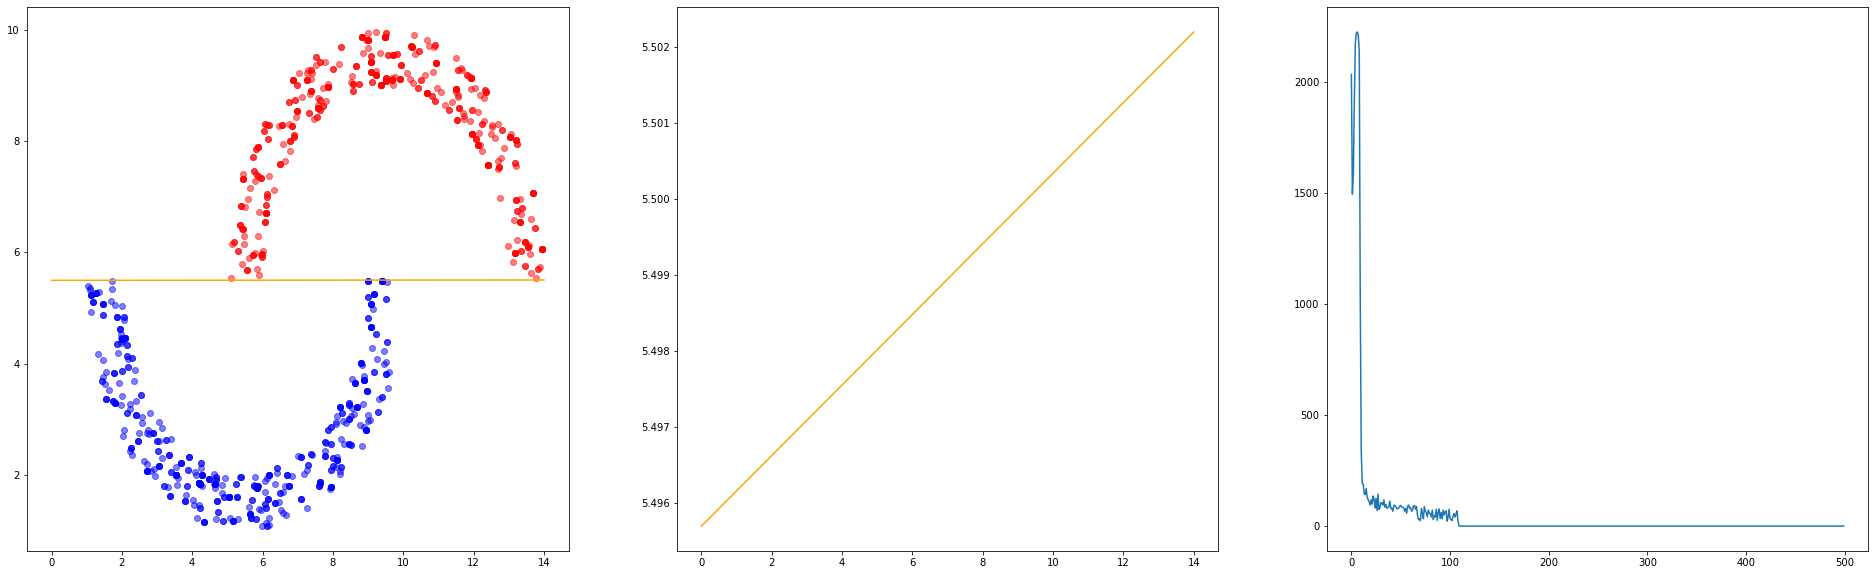

In [6]:
if __name__ == '__main__': 
    # plt
    positive_f1 = [X_test[i][0] for i in range(len(X_test)) if y_test[i] == 1]
    positive_f2 = [X_test[i][1] for i in range(len(X_test)) if y_test[i] == 1]
    negetive_f1 = [X_test[i][0] for i in range(len(X_test)) if y_test[i] == -1]
    negetive_f2 = [X_test[i][1] for i in range(len(X_test)) if y_test[i] == -1]

    mistake_f1_pre = [X_test[i][0] for i in range(len(X_test)) if y_predict[i] != y_test[i]]
    mistake_f2_pre = [X_test[i][1] for i in range(len(X_test)) if y_predict[i] != y_test[i]]


    fig = plt.figure(num=1,figsize=(33,10))
    ax1 = fig.add_subplot(131)

    ax1.scatter(positive_f1,positive_f2,c = 'red',alpha=0.5)
    ax1.scatter(negetive_f1,negetive_f2,c = 'blue',alpha=0.5)

    line_x = np.linspace(0,14,100)
    # line_x = np.linspace(-3,3,100)

    line_w = -1*(perceptron.w[0]/perceptron.w[1])
    line_b = -1*(float(perceptron.w[2])/perceptron.w[1])

    line_y = list(map(lambda x : x*line_w + line_b ,line_x))

    ax1.plot(line_x,line_y,c = 'orange')

    ax2 = fig.add_subplot(132)


    ax2.scatter(mistake_f1_pre,mistake_f2_pre,c = 'orange',alpha=0.5)
    ax2.plot(line_x,line_y,c = 'orange')

    ax3 = fig.add_subplot(133)
    ax3.plot(range(len(perceptron.lost)),perceptron.lost)

    print(line_w,line_b)

    plt.show()
